In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

D = np.load("C:/Users/HP/OneDrive/Documents/Study/AI/AIclass/mnist.npz")
trn_lbls = D["train_labels"]
trn_imgs = D["train_imgs"]
idx = trn_lbls <=1
lbls = trn_lbls[idx]
imgs = trn_imgs[idx]
sz = lbls.size

In [3]:
areas = np.zeros(sz)
for n in range(sz):
    bw = imgs[n] < 128
    areas[n] = np.sum(bw)

In [23]:
def calc_acc(lbls, preds):
    acc = np.sum(lbls==preds)/ lbls.size* 100
    return np.round(acc, 2)
print(calc_acc(lbls==1, areas<100))

92.7


Max accuracy: 93.65


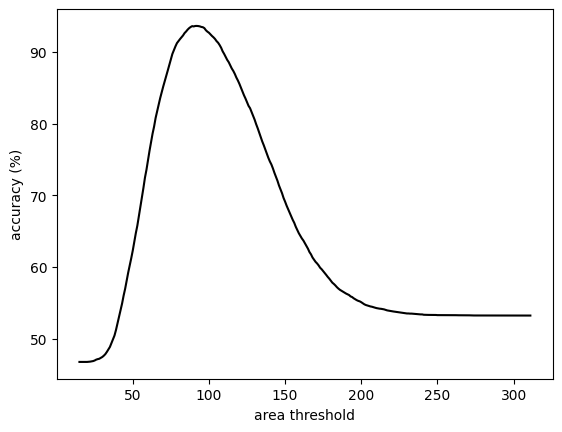

In [24]:
lo, hi = np.min(areas), np.max(areas)
x_thres = np.arange(lo,hi)
y_acc = np.zeros(x_thres.size)
for n in range (x_thres.size):
    y_acc[n] = calc_acc(lbls == 1, areas<x_thres[n])
plt.plot(x_thres, y_acc, 'k-')
plt.xlabel('area threshold')
plt.ylabel('accuracy (%)')
print(f"Max accuracy: {np.max(y_acc)}")


In [25]:
from skimage import morphology

hulls = np.zeros(sz)
for n in range(sz):
    bw= morphology.convex_hull_image(imgs[n] < 128)
    hulls[n] = np.sum(bw)

In [26]:
w1, w2, thres = 1.0, 0.5, 180
combined = w1*areas + w2*hulls
print(calc_acc(lbls == 1, combined<thres))

96.99


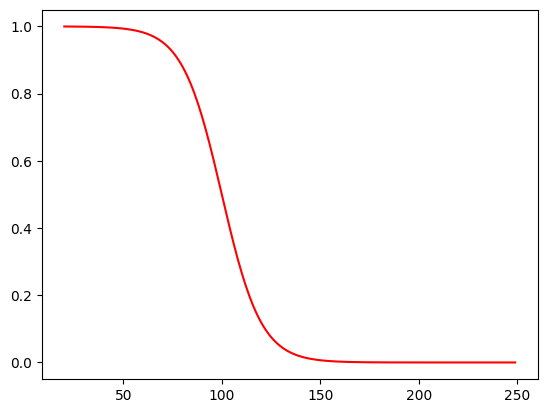

In [30]:
x = np.arange(20, 250)
y = 10 - 0.1*x
y_prob = 1 / (1 + np.exp(-y))
plt.plot(x, y_prob, 'r-')

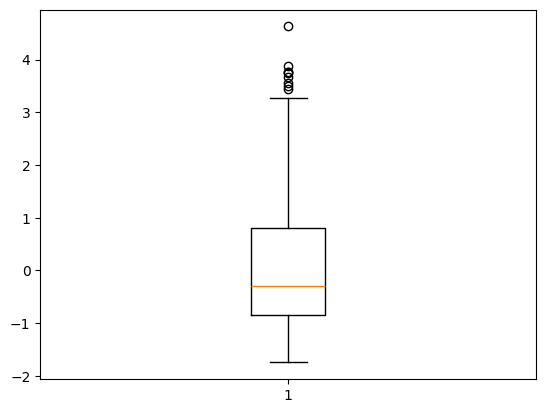

In [ ]:
#z normalisation 
z_areas = (areas - np.mean(areas))/ np.std(areas)
_ = plt.boxplot(z_areas)

Gradient descent : calculate gradient use it to make next guess (parameter update)

In [33]:
def model(w,b,x):
    val = w * x + b
    return 1/ (1 + np.exp(-val))
def loss(lbls, preds):
    return np.mean(np.square(lbls - preds))

def mdl_loss(lbls, w, b, x):
    return loss(lbls,model(w,b,x))

In [53]:
w, b = 1, 0 
delta = 1e-9
lrn_rate = 1e-1
losses = np.zeros(1000)
for n in range(losses.size): 
    lv = mdl_loss(lbls, w, b, z_areas) # lose value
    w_grad = (mdl_loss(lbls, w+delta, b, z_areas)- lv)/ delta
    b_grad = (mdl_loss(lbls, w, b+delta, z_areas)- lv)/ delta
    w = w -w_grad*lrn_rate
    b = b -b_grad*lrn_rate
    losses[n] = lv

print(lv)
print([w,b])

0.055111322556178614
[np.float64(-2.840508604191495), np.float64(-0.12088917020203205)]


In [54]:
preds = model(w, b, z_areas)
print(calc_acc(lbls == 1, preds>0.5))

93.51


Text(0.5, 0, 'iterarion ')

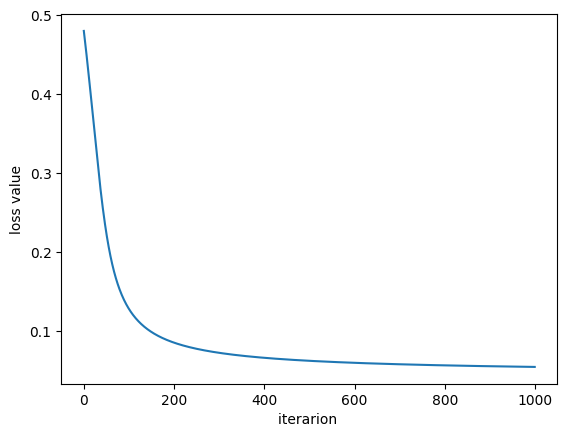

In [55]:
plt.plot(losses)
plt.ylabel('loss value')
plt.xlabel('iterarion ')

In [56]:
z_hulls = (hulls - np.mean(hulls))/ np.std(hulls)
combined = np.stack([z_areas, z_hulls], axis = 1)
print(combined.shape)

(12665, 2)


In [57]:
def model(w, b, x):
    val = (x @ w + b).flatten()
    return 1/(1+ np.exp(-val))

In [61]:
w, b = np.array([[1.0, 1.0]]).T, 0
delta = 1e-9
lrn_rate = 1e-1
losses = np.zeros(1000)
for n in range(losses.size): 
    lv = mdl_loss(lbls, w, b, combined) # lose value
    wx = np.copy(w)
    wx[0] += delta
    w1_grad =(mdl_loss(lbls, wx, b, combined)- lv)/ delta
    wx = np.copy(w)
    wx[1] += delta
    w2_grad = (mdl_loss(lbls, wx, b, combined)- lv)/delta
    b_grad = (mdl_loss(lbls, w, b+delta, combined)-lv)/delta
    wx = np.array([[w1_grad, w2_grad]]).T
 
    w = w -wx*lrn_rate
    b = b -b_grad*lrn_rate
    losses[n] = lv

print(lv)
print([w.flatten(),b])

0.0221887534327359
[array([-1.24969552, -2.25420154]), np.float64(-0.04622171916046636)]


In [62]:
preds = model(w, b, combined)
print(calc_acc(lbls==1, preds>0.5))

97.81
